# Sentimental Analysis for Costomer Review

## Importing Library 

In [1]:
import re
import pickle
import pandas as pd
import numpy as np
import tensorflow as tf
from nltk.corpus import stopwords,wordnet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding,LSTM,Dropout
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

## Data Preprocessing 

In [2]:
data = pd.read_csv("/content/Review_Data.csv")

In [3]:
data.head(2)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...,Eric Tie,https://play-lh.googleusercontent.com/a-/AOh14...,I cannot open the app anymore,1,0,5.4.0.6,2020-10-27 21:24:41,NaN,NaN,newest,com.anydo
1,gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...,john alpha,https://play-lh.googleusercontent.com/a-/AOh14...,I have been begging for a refund from this app...,1,0,NaN,2020-10-27 14:03:28,"Please note that from checking our records, yo...",2020-10-27 15:05:52,newest,com.anydo


In [4]:
data.drop(['reviewId','userImage','at','repliedAt'],inplace=True,axis=1)

In [5]:
data.score.value_counts()

5    2879
4    2775
1    2506
2    2344
3    1991
Name: score, dtype: int64

In [6]:
data.userName = data.userName.str.lower()

In [7]:
data.content = data.content.str.lower()
data.replyContent = data.replyContent.str.lower()

In [8]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [9]:
data.content= data.content.str.replace('[^\w\s\.]','')

In [10]:
text1 = data.content.values

In [11]:
def preprocess_text(text):
    # Tokenise words while ignoring punctuation
    tokeniser = RegexpTokenizer(r'\w+')
    tokens = tokeniser.tokenize(text)
    
    # Lowercase and lemmatise 
    lemmatiser = WordNetLemmatizer()
    lemmas = [lemmatiser.lemmatize(token.lower(), pos='v') for token in tokens]
    
    # Remove stopwords
    keywords= [lemma for lemma in lemmas if lemma not in stopwords.words('english')]
    keywords = ' '.join(keywords)
    return keywords

In [12]:
corpus=[]
for i in range(len(text1)):
    #text1[i]=text1[i].replace('@VirginAmerica','')
    text1[i]=text1[i].replace("cant't",'can not')
    text1[i]=text1[i].replace("don't",'do not')
    text1[i]=text1[i].replace("dont",'do not')
    text1[i]=text1[i].replace("should't",'should not')
    text1[i]=text1[i].replace("could't",'could not')
    text1[i]=text1[i].replace("couldn",'could not')
    text1[i]=text1[i].replace("did't",'did not')
    text1[i]=text1[i].replace("didn",'did not')
    text1[i]=text1[i].replace("does't",'does not')
    text1[i]=text1[i].replace("doesn",'does not')
    text1[i]=text1[i].replace("ive",'i have')
    text1[i]=text1[i].replace("nott",'not')
    text1[i]=text1[i].replace("im",'i am')

    text1[i] = re.sub(r"(?:\@|https?\://)\S+", "", text1[i])
    #review=re.sub('[^a-zA-Z]',' ',text1[i])
    review = preprocess_text(text1[i])
    # review = review.lower()
    # review = review.split()
    #review = ' '.join(review)
    
    corpus.append(review)
   

In [14]:
token = tf.keras.preprocessing.text.Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ')

In [15]:
xx = corpus
token.fit_on_texts(xx)
xx=token.texts_to_sequences(xx)

In [16]:

le=0
mean = 0 
len1=[]
for i in range(len(xx)):
  
  e = xx[i]
  mean = mean + len(e)
  len1.append(len(e))
  if le<len(e):
    #print(i)
    le=len(e)
max_len=le


In [17]:
t2=0
for ele in xx:
    if len(ele)>0:
          if max(ele)>t2:
            t2=max(ele)
vocab=t2

In [18]:
vocab

10948

In [ ]:
df = {'lenths':len1}
df = pd.DataFrame(df)

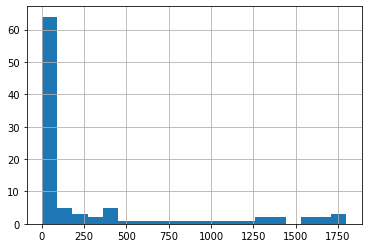

In [ ]:
df.lenths.value_counts().hist(bins=20)

In [19]:
xx1=tf.keras.preprocessing.sequence.pad_sequences(xx,maxlen=30,padding='post')

In [21]:
enc = OneHotEncoder()
th = enc.fit_transform(np.array(data.score).reshape((len(data.score),1)))

In [22]:
th = th.toarray()

In [23]:
x_train,x_test,y_train,y_test=train_test_split(xx1,th,test_size=0.20,random_state=0)

## Model Building

<strong>
A LSTM Based Deep Nueral Network Model which  usese self created <strong> Embedding</strong>
</strong>

In [33]:
# A LSTM Bases Model 
model=Sequential() 
model.add(Embedding(input_dim=13342+1,output_dim=100,input_length=30))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(125, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(5, activation='sigmoid'))
model.summary()
# model=Sequential() 
# model.add(Embedding(input_dim=13342+1,output_dim=100,input_length=max_len))
# model.add(LSTM(50, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dense(5, activation='sigmoid'),sparse=True)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 30, 100)           1334300   
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 125)               12625     
_________________________________________________________________
dropout_6 (Dropout)          (None, 125)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 630       
Total params: 1,427,955
Trainable params: 1,427,955
Non-trainable params: 0
____________________________________________

In [34]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [35]:
mf=model.fit(x_train, y_train,
          batch_size=80,
          epochs=10,
          validation_data=(x_test,y_test))

Epoch 1/10
125/125 [==============================] - 4s 19ms/step - loss: 1.4721 - accuracy: 0.3136 - val_loss: 1.3607 - val_accuracy: 0.3758
Epoch 2/10
125/125 [==============================] - 2s 15ms/step - loss: 1.2556 - accuracy: 0.4172 - val_loss: 1.2987 - val_accuracy: 0.4218
Epoch 3/10
125/125 [==============================] - 2s 15ms/step - loss: 1.1533 - accuracy: 0.4807 - val_loss: 1.2752 - val_accuracy: 0.4450
Epoch 4/10
125/125 [==============================] - 2s 16ms/step - loss: 1.0500 - accuracy: 0.5516 - val_loss: 1.3306 - val_accuracy: 0.4582
Epoch 5/10
125/125 [==============================] - 2s 15ms/step - loss: 0.9659 - accuracy: 0.6031 - val_loss: 1.3286 - val_accuracy: 0.4530
Epoch 6/10
125/125 [==============================] - 2s 14ms/step - loss: 0.8950 - accuracy: 0.6446 - val_loss: 1.4299 - val_accuracy: 0.4526
Epoch 7/10
125/125 [==============================] - 2s 15ms/step - loss: 0.8264 - accuracy: 0.6786 - val_loss: 1.4535 - val_accuracy: 0.4446

## Storing the Model and Tokenizer

In [36]:
model.save('model_score_1')

INFO:tensorflow:Assets written to: model_score_1/assets


INFO:tensorflow:Assets written to: model_score_1/assets


In [ ]:

with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(token, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
sent = ['hello how are you it was good']

In [ ]:
cc = pre(sent)

In [ ]:
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer2 = pickle.load(handle)

In [ ]:
vv = tokenizer2.texts_to_sequences(cc)

In [ ]:
xx1=tf.keras.preprocessing.sequence.pad_sequences(vv,maxlen=40,padding='post')

In [ ]:
xx1

array([[1493,   87,   42,   14,    4,   37,   25,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0]], dtype=int32)

In [ ]:
mod =keras.models.load_model('model_score_1')

In [ ]:
p = mod.predict(xx1)

In [ ]:
np.argmax(p)

0

In [ ]:
def predict(sent):
  cc = pre(sent)
  with open('tokenizer.pickle', 'rb') as handle:
    tokenizer2 = pickle.load(handle)
  vv = tokenizer2.texts_to_sequences(cc)
  xx1=tf.keras.preprocessing.sequence.pad_sequences(vv,maxlen=40,padding='post')
  mod =keras.models.load_model('model_score_1')
  p = mod.predict(xx1)
  return np.argmax(p)

In [ ]:
predict(sent)

0

In [37]:
!zip -r /content/model_score_3.zip /content/model_score_1

  adding: content/model_score_1/ (stored 0%)
  adding: content/model_score_1/assets/ (stored 0%)
  adding: content/model_score_1/variables/ (stored 0%)
  adding: content/model_score_1/variables/variables.data-00000-of-00001 (deflated 27%)
  adding: content/model_score_1/variables/variables.index (deflated 62%)
  adding: content/model_score_1/saved_model.pb (deflated 89%)
  adding: content/model_score_1/keras_metadata.pb (deflated 88%)
